In [31]:
# imports
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['font.size'] = 11
import numpy as np
import scipy.constants as spc
import cmath as cmath

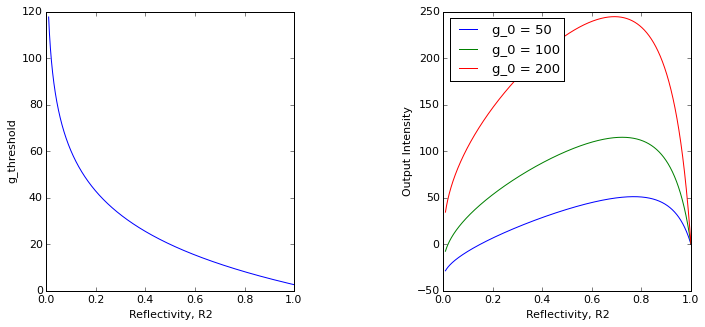

In [2]:
# problem 1
L = 0.01
R1 = 1.0
R2 = np.arange(0.01,1,0.0001)
I_sat = 100.0
g0 = np.array([50.0,100.0,200.0])
g0 = g0.reshape(len(g0),1)
loss = 0.9

fig = plt.figure(figsize=[16, 5])
gs = matplotlib.gridspec.GridSpec(1, 2, width_ratios=[20, 20, 20], wspace=0.4, hspace=0.4)

g_th = (1.0/(4.0*L))*np.log(1.0/(loss*R1*R2))
plt.subplot(gs[0])
plt.plot(R2,g_th)
plt.xlabel('Reflectivity, R2')
plt.ylabel('g_threshold')

I_out = (g0/g_th-1.0)*I_sat*(2.0-R1-R2)/2.0
plt.subplot(gs[1])
plt.plot(R2,I_out[0])
plt.xlabel('Reflectivity, R2')
plt.ylabel('Output Intensity')
plt.plot(R2,I_out[1])
plt.plot(R2,I_out[2])
plt.legend(['g_0 = 50','g_0 = 100','g_0 = 200'],loc='upper left')



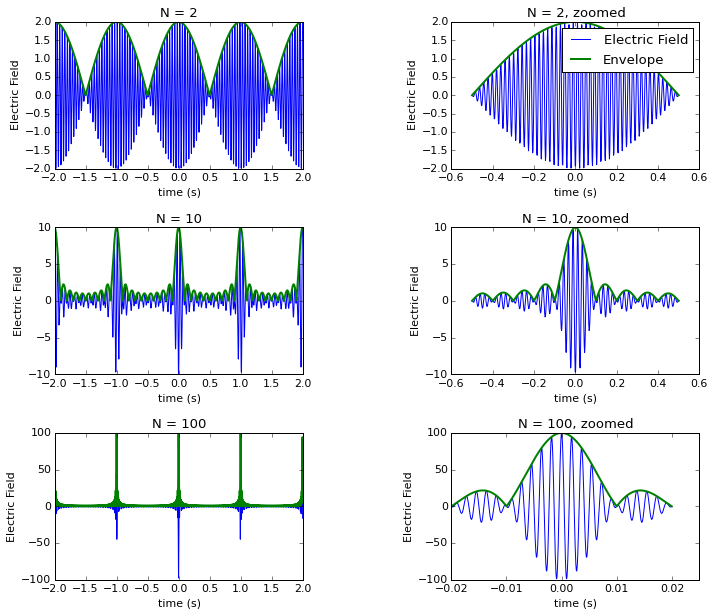

In [75]:
# problem 3a
E_0 = 1.0
dw = 2.0*np.pi
w1 = 2*np.pi*500.0
N=np.array([2,10,100])
N = N.reshape(N.size,1)

t1=np.linspace(-2,2,2100)
t2=np.linspace(-0.5,0.5,550)
t3=np.linspace(-0.02,0.02,1000)
I0=1.0  #W/m^2
E0=np.sqrt(I0)

Env=E0*np.abs(np.sin(N*dw*t1/2)/np.sin(dw*t1/2))
E=E0*(np.sin(N*dw*t1/2)/np.sin(dw*t1/2))*np.cos((w1+dw*(N-1)/2)*t1)

Env_zoom=E0*np.abs(np.sin(N*dw*t2/2)/np.sin(dw*t2/2))
E_zoom=E0*(np.sin(N*dw*t2/2)/np.sin(dw*t2/2))*np.cos((w1+dw*(N-1)/2)*t2)
Env_zoom2=E0*np.abs(np.sin(N*dw*t3/2)/np.sin(dw*t3/2))
E_zoom2=E0*(np.sin(N*dw*t3/2)/np.sin(dw*t3/2))*np.cos((w1+dw*(N-1)/2)*t3)

fig = plt.figure(figsize=[16, 10])
gs = matplotlib.gridspec.GridSpec(3, 2, width_ratios=[20, 20, 20], wspace=0.4, hspace=0.4)

plt.subplot(gs[0])
plt.plot(t1,E[0])
plt.plot(t1,Env[0],linewidth = 2)
plt.title('N = 2')
plt.xlabel('time (s)')
plt.ylabel('Electric Field')

plt.subplot(gs[2])
plt.plot(t1,E[1])
plt.plot(t1,Env[1],linewidth = 2)
plt.title('N = 10')
plt.xlabel('time (s)')
plt.ylabel('Electric Field')

plt.subplot(gs[4])
plt.plot(t1,E[2])
plt.plot(t1,Env[2],linewidth = 2)
plt.title('N = 100')
plt.xlabel('time (s)')
plt.ylabel('Electric Field')

plt.subplot(gs[1])
plt.plot(t2,E_zoom[0])
plt.plot(t2,Env_zoom[0],linewidth = 2)
plt.title('N = 2, zoomed')
plt.xlabel('time (s)')
plt.ylabel('Electric Field')
plt.legend(['Electric Field','Envelope'])

plt.subplot(gs[3])
plt.plot(t2,E_zoom[1])
plt.plot(t2,Env_zoom[1],linewidth = 2)
plt.title('N = 10, zoomed')
plt.xlabel('time (s)')
plt.ylabel('Electric Field')

plt.subplot(gs[5])
plt.plot(t3,E_zoom2[2])
plt.plot(t3,Env_zoom2[2],linewidth = 2)
plt.xticks([-0.02,-0.01,0,0.01,0.02])
plt.title('N = 100, zoomed')
plt.xlabel('time (s)')
plt.ylabel('Electric Field')

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  from ipykernel import kernelapp as app


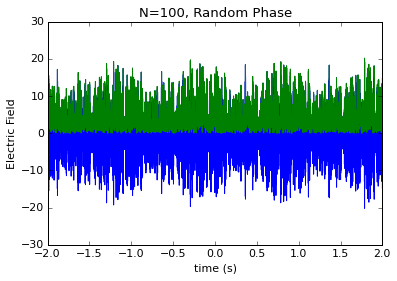

In [76]:
# problem 3b
phi=2.0*np.pi*np.random.rand(N[2])
t=np.linspace(-2,2,5000)
E=np.zeros(t.size)

for k in range(t.size):
    E1=0
    for i in range(phi.size):
        E1= E1 + cmath.exp(-1j*phi[i])*cmath.exp(-1j*(w1+dw*i)*t[k])
    E[k]=E1.real
    
Env=np.abs(E)

plt.plot(t,E)
plt.plot(t,Env)
plt.title('N=100, Random Phase')
plt.xlabel('time (s)')
plt.ylabel('Electric Field')

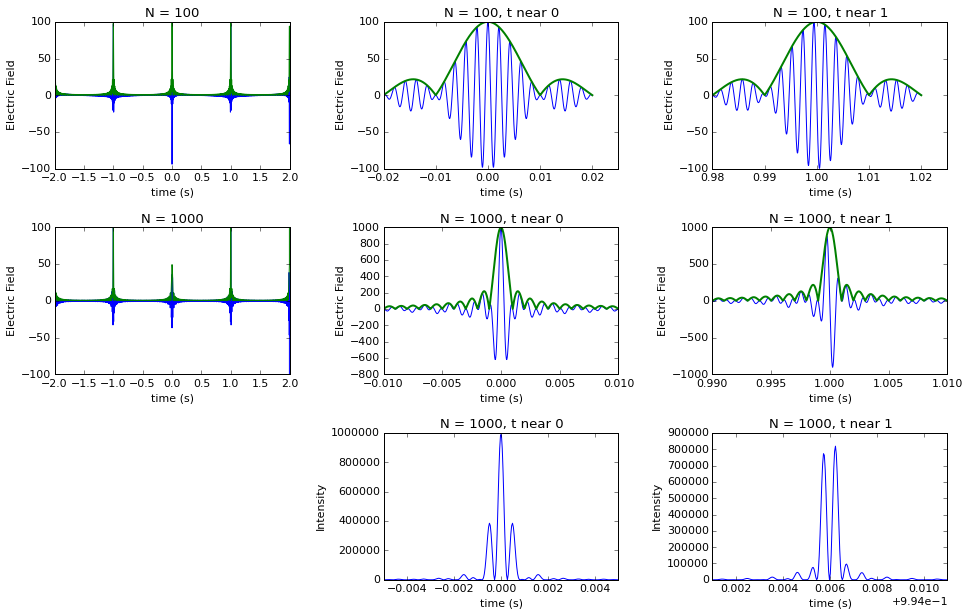

In [78]:
# problem 4
E_0 = 1.0
dw = 2.0*np.pi
w1 = 2*np.pi*300.0*np.sqrt(2)
N=np.array([100,1000])
N = N.reshape(N.size,1)

t1=np.linspace(-2,2,2100)
t2=np.linspace(-0.02,0.02,1100)
t3=np.linspace(0.98,1.02,1100)
I0=1.0  #W/m^2
E0=np.sqrt(I0)

Env=E0*np.abs(np.sin(N*dw*t1/2)/np.sin(dw*t1/2))
E=E0*(np.sin(N*dw*t1/2)/np.sin(dw*t1/2))*np.cos((w1+dw*(N-1)/2)*t1)

Env_zoom=E0*np.abs(np.sin(N*dw*t2/2)/np.sin(dw*t2/2))
E_zoom=E0*(np.sin(N*dw*t2/2)/np.sin(dw*t2/2))*np.cos((w1+dw*(N-1)/2)*t2)
Env_zoom2=E0*np.abs(np.sin(N*dw*t3/2)/np.sin(dw*t3/2))
E_zoom2=E0*(np.sin(N*dw*t3/2)/np.sin(dw*t3/2))*np.cos((w1+dw*(N-1)/2)*t3)

fig = plt.figure(figsize=[16, 10])
gs = matplotlib.gridspec.GridSpec(3, 3, width_ratios=[20, 20, 20], wspace=0.4, hspace=0.4)

plt.subplot(gs[0])
plt.plot(t1,E[0])
plt.plot(t1,Env[0])
plt.title('N = 100')
plt.xlabel('time (s)')
plt.ylabel('Electric Field')

plt.subplot(gs[1])
plt.plot(t2,E_zoom[0])
plt.plot(t2,Env_zoom[0],linewidth = 2)
plt.xticks([-0.02,-0.01,0,0.01,0.02])
plt.title('N = 100, t near 0')
plt.xlabel('time (s)')
plt.ylabel('Electric Field')

plt.subplot(gs[2])
plt.plot(t3,E_zoom2[0])
plt.plot(t3,Env_zoom2[0],linewidth = 2)
plt.xticks([0.98,0.99,1,1.01,1.02])
plt.title('N = 100, t near 1')
plt.xlabel('time (s)')
plt.ylabel('Electric Field')

plt.subplot(gs[3])
plt.plot(t1,E[1])
plt.plot(t1,Env[1])
plt.ylim([-100,100])
plt.title('N = 1000')
plt.xlabel('time (s)')
plt.ylabel('Electric Field')

plt.subplot(gs[4])
plt.plot(t2,E_zoom[1])
plt.plot(t2,Env_zoom[1],linewidth = 2)
plt.xlim([-0.01,0.01])
plt.title('N = 1000, t near 0')
plt.xlabel('time (s)')
plt.ylabel('Electric Field')

plt.subplot(gs[5])
plt.plot(t3,E_zoom2[1])
plt.plot(t3,Env_zoom2[1],linewidth = 2)
plt.xlim([0.99,1.01])
plt.title('N = 1000, t near 1')
plt.xlabel('time (s)')
plt.ylabel('Electric Field')

I_zoom = (E_zoom[1])**2
I_zoom2 = (E_zoom2[1])**2

plt.subplot(gs[7])
plt.plot(t2,I_zoom)
plt.xlim([-0.005,0.005])
plt.title('N = 1000, t near 0')
plt.xlabel('time (s)')
plt.ylabel('Intensity')

plt.subplot(gs[8])
plt.plot(t3,I_zoom2)
plt.xlim([0.995,1.005])
plt.title('N = 1000, t near 1')
plt.xlabel('time (s)')
plt.ylabel('Intensity')